# Activity 1

## Part 1: Explore the dataset from RateMyProfessor.com

In [37]:
# import library
library(ggplot2) # for visualization

In [38]:
# import data
dat = read.csv('prof_train.csv')

In [39]:
head(dat) # display the first few rows of data

gender,numYears,numRaters,numCourses,pepper,discipline,quality,helpfulness,clarity,easiness,raterInterest,area
female,1,16,3,no,STEM,2.406250,2.375000,2.437500,1.937500,2.875000,Midwest
female,2,20,5,no,Hum,3.925000,4.000000,3.500000,3.850000,3.250000,Midwest
male,11,25,12,no,STEM,4.620000,4.720000,4.520000,2.480000,4.117647,Midwest
female,5,67,3,no,Hum,2.977612,2.955224,3.000000,2.373134,2.552239,Midwest
male,3,15,3,no,STEM,2.500000,2.733333,2.266667,2.733333,3.000000,Midwest
female,6,19,4,no,SocSci,4.684211,4.894737,4.473684,4.210526,4.368421,Midwest


In [40]:
str(dat)  # structure of data, you can see the type of variables in the dataset

'data.frame':	290 obs. of  12 variables:
 $ gender       : Factor w/ 2 levels "female","male": 1 1 2 1 2 1 1 2 2 1 ...
 $ numYears     : int  1 2 11 5 3 6 11 6 11 11 ...
 $ numRaters    : int  16 20 25 67 15 19 21 18 67 58 ...
 $ numCourses   : int  3 5 12 3 3 4 5 3 4 5 ...
 $ pepper       : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ discipline   : Factor w/ 4 levels "Hum","Pre-prof",..: 4 1 4 1 4 3 1 3 4 1 ...
 $ quality      : num  2.41 3.92 4.62 2.98 2.5 ...
 $ helpfulness  : num  2.38 4 4.72 2.96 2.73 ...
 $ clarity      : num  2.44 3.5 4.52 3 2.27 ...
 $ easiness     : num  1.94 3.85 2.48 2.37 2.73 ...
 $ raterInterest: num  2.88 3.25 4.12 2.55 3 ...
 $ area         : Factor w/ 1 level "Midwest": 1 1 1 1 1 1 1 1 1 1 ...


### The attribute "area" only has one value "Midwest". It is not informative so we may remove it to reduce the number of dimensions. 

In [41]:
# For simplicity, we will not use the Factor attributes in this dataset
dat1 = dat[, c(2,3,4,7,8,9,10,11)]  # Define a new dataset with only the numerical variables (no factors)
head(dat1)

numYears,numRaters,numCourses,quality,helpfulness,clarity,easiness,raterInterest
1,16,3,2.406250,2.375000,2.437500,1.937500,2.875000
2,20,5,3.925000,4.000000,3.500000,3.850000,3.250000
11,25,12,4.620000,4.720000,4.520000,2.480000,4.117647
5,67,3,2.977612,2.955224,3.000000,2.373134,2.552239
3,15,3,2.500000,2.733333,2.266667,2.733333,3.000000
6,19,4,4.684211,4.894737,4.473684,4.210526,4.368421


In [42]:
summary(dat1) # the range of each variable

    numYears        numRaters       numCourses        quality     
 Min.   : 1.000   Min.   :10.00   Min.   : 1.000   Min.   :1.409  
 1st Qu.: 6.000   1st Qu.:15.00   1st Qu.: 3.000   1st Qu.:2.900  
 Median :10.000   Median :24.00   Median : 4.000   Median :3.553  
 Mean   : 8.338   Mean   :28.53   Mean   : 4.234   Mean   :3.528  
 3rd Qu.:11.000   3rd Qu.:36.00   3rd Qu.: 5.000   3rd Qu.:4.233  
 Max.   :11.000   Max.   :86.00   Max.   :12.000   Max.   :4.981  
  helpfulness       clarity         easiness     raterInterest  
 Min.   :1.364   Min.   :1.333   Min.   :1.391   Min.   :1.098  
 1st Qu.:3.000   1st Qu.:2.769   1st Qu.:2.506   1st Qu.:2.916  
 Median :3.600   Median :3.551   Median :3.067   Median :3.288  
 Mean   :3.587   Mean   :3.476   Mean   :3.100   Mean   :3.303  
 3rd Qu.:4.315   3rd Qu.:4.200   3rd Qu.:3.645   3rd Qu.:3.692  
 Max.   :5.000   Max.   :4.963   Max.   :4.900   Max.   :4.719  

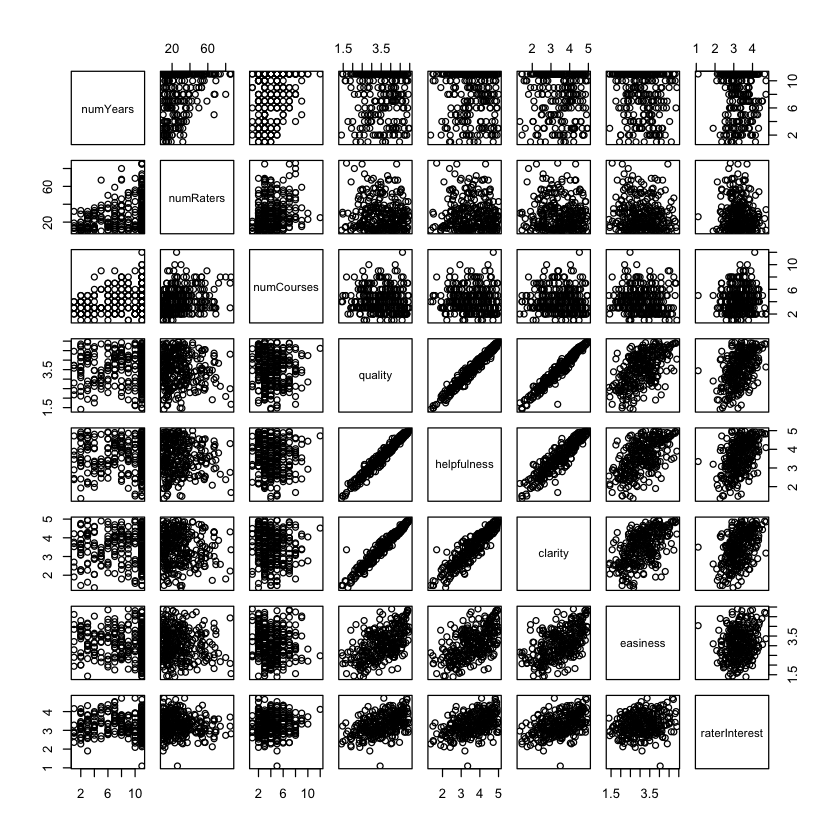

In [43]:
pairs(dat1) # explore the scatterplot matrix

### From the plot above, we can see some pretty strong linear relationship between variables

In [44]:
cor(dat1$quality, dat1$helpfulness) # calculate the correlation between "quality" and "helpfulness"

[1] 0.9797832

In [45]:
cor(dat1)  # calculate the correlation of each pair of variables. 

,numYears,numRaters,numCourses,quality,helpfulness,clarity,easiness,raterInterest
numYears,1.00000000,0.30777074,0.24161785,-0.01825609,-0.02384318,-0.00866107,-0.12772417,-0.01517155
numRaters,0.30777074,1.00000000,0.23188079,-0.06917069,-0.05634814,-0.05917504,-0.08468868,-0.11585018
numCourses,0.24161785,0.23188079,1.00000000,-0.06252803,-0.04582018,-0.06754551,-0.06823359,0.06196215
quality,-0.01825609,-0.06917069,-0.06252803,1.00000000,0.97978318,0.97282677,0.56731115,0.47898903
helpfulness,-0.02384318,-0.05634814,-0.04582018,0.97978318,1.00000000,0.91366488,0.56349951,0.46783436
clarity,-0.00866107,-0.05917504,-0.06754551,0.97282677,0.91366488,1.00000000,0.53622527,0.47045073
easiness,-0.12772417,-0.08468868,-0.06823359,0.56731115,0.56349951,0.53622527,1.00000000,0.19577732
raterInterest,-0.01517155,-0.11585018,0.06196215,0.47898903,0.46783436,0.47045073,0.19577732,1.00000000


## Part 2: Build a prediction model

### Next we will build a prediction model for the "quality" rating of a professor and then test the performance of our prediction model. 

### Let's set "quality" aside since it is the response variable in our prediction model. The rest of the variables are the attributes we may consider reducing the dimensions of. 

### "helpfulness" seems to be a good indicator for "quality", considering the high correlation between "quality" and "helpfulness". 


In [46]:
mod0 = lm(quality ~ helpfulness, data = dat1)  # regression model

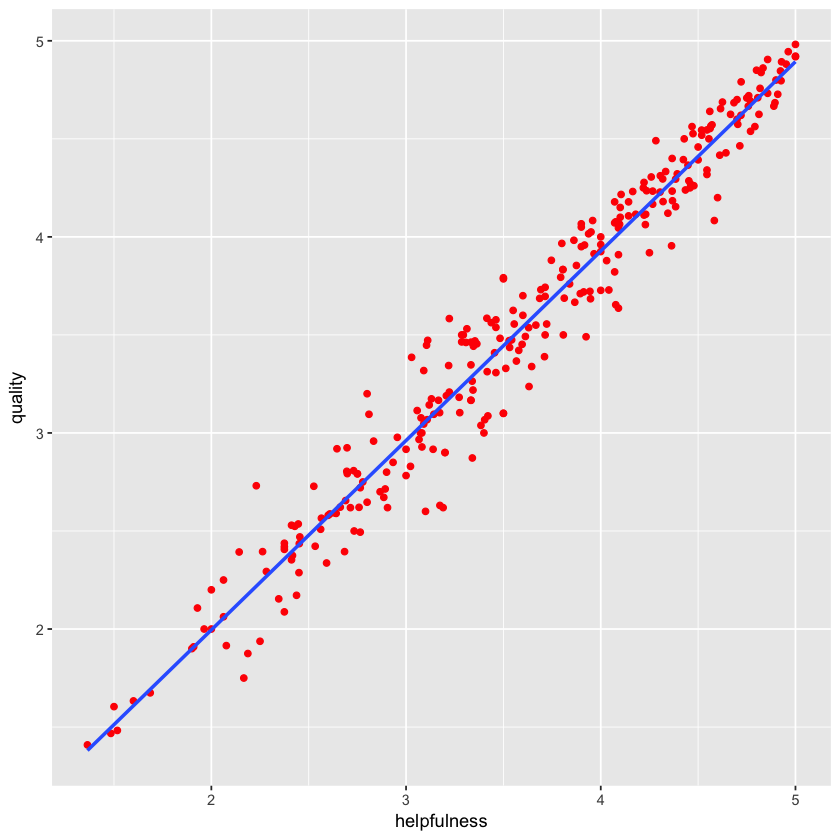

In [47]:
ggplot(data = dat1, aes(x = helpfulness, y = quality)) + 
  geom_point(color='red') +
  geom_smooth(method = "lm", se = FALSE)

### In the plot, the red dots represent the pairs of (helpfulness, quality) from dat1. The blue line represents our regression model. 

### We've reduced the dimensions from 7 (numYears, numRates, numCourses, helpfulness, clarity, easiness, raterInterest) to 1 (helpfulness)! Next we will see some more systematic methods for dimension reduction. 

## Part 3: Make predictions on 40 professors

In [48]:
test = read.csv('prof_test.csv')
head(test) # we don't have "quality" rating, need to predict it. 

gender,numYears,numRaters,numCourses,pepper,discipline,helpfulness,clarity,easiness,raterInterest,area
female,5,42,6,yes,SocSci,4.547619,4.523810,2.500000,3.761905,Midwest
female,2,15,1,no,Pre-prof,3.666667,3.200000,3.200000,3.000000,Midwest
male,11,57,5,no,Hum,2.280702,1.894737,2.631579,3.166667,Midwest
female,1,10,4,yes,Hum,3.900000,4.000000,3.400000,3.900000,Midwest
female,2,16,1,yes,SocSci,4.937500,4.937500,4.000000,2.187500,Midwest
male,11,79,7,no,Hum,2.696203,2.443038,2.658228,2.956522,Midwest


In [49]:
predict(mod0, test)

1        2        3        4        5        6        7        8 
4.456560 3.605518 2.266609 3.830929 4.833204 2.668003 3.384132 3.541115 
       9       10       11       12       13       14       15       16 
2.226449 2.596534 1.812672 4.533682 2.982040 3.128046 3.622466 3.864531 
      17       18       19       20       21       22       23       24 
4.013405 4.617568 2.794285 3.467511 3.998220 3.952956 4.373402 4.183832 
      25       26       27       28       29       30       31       32 
3.226370 3.553580 4.410558 4.454469 3.781163 2.924330 3.594414 3.927534 
      33       34       35       36       37       38       39       40 
3.219099 4.278824 4.378356 3.488421 2.961486 4.446337 3.416097 4.893582

### Voila, these are the predicted "quality" ratings for the 76 professors! Let's compare them to the truth (the real "quality" rating for these professors. )

In [50]:
truth = read.csv('prof_test_truth.csv')

In [51]:
head(truth)

quality
4.535714
3.433333
2.085965
3.950000
4.937500
2.569620


### We use the average of the | predicted quality - truth quality | (absolute value) to measure the performance of our model. 

In [52]:
mean(abs(truth$quality - predict(mod0, test)))

[1] 0.1184758

### Keep this value in mind as we evaluate the performance of other models later. 